# MiniBooNE Project

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
import seaborn as sns  
import matplotlib.pyplot as plt    # basic plotting library            
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler  
warnings.filterwarnings("ignore")
%matplotlib inline

In [22]:
# We load the data and we add the target "class" to the file
data = pd.read_fwf("MiniBooNE_PID.txt", index_col=False,names=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20','p21','p22','p23','p24','p25','p26','p27','p28','p29','p30','p31','p32','p33','p34','p35','p36','p37','p38','p39','p40','p41','p42','p43','p44','p45','p46','p47','p48','p49','p50'])
Event = 36499
Background = 93565
cl = []
for i in range (Event):
    cl += [1]
for i in range (Background):
    cl += [0]
data.insert(50, "class", cl, allow_duplicates=False)

In [23]:
# We print some data to check we collected it correctly
data.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p42,p43,p44,p45,p46,p47,p48,p49,p50,class
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130064 entries, 0 to 130063
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   p1      130064 non-null  float64
 1   p2      130064 non-null  float64
 2   p3      130064 non-null  float64
 3   p4      130064 non-null  float64
 4   p5      130064 non-null  float64
 5   p6      130064 non-null  float64
 6   p7      130064 non-null  float64
 7   p8      130064 non-null  float64
 8   p9      130064 non-null  float64
 9   p10     130064 non-null  float64
 10  p11     130064 non-null  float64
 11  p12     130064 non-null  float64
 12  p13     130064 non-null  float64
 13  p14     130064 non-null  float64
 14  p15     130064 non-null  float64
 15  p16     130064 non-null  float64
 16  p17     130064 non-null  float64
 17  p18     130064 non-null  float64
 18  p19     130064 non-null  float64
 19  p20     130064 non-null  float64
 20  p21     130064 non-null  float64
 21  p22     13

In [25]:
#Some statistics
data.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p42,p43,p44,p45,p46,p47,p48,p49,p50,class
count,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,...,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000
mean,8.441060,5.081710,130.984301,3.876743,-3.585353,3.754849,4.561360,4.415570,7.033580,3.767904,...,-25.225963,-2.863924,9.582410,3.603655,3.772769,-3.753232,6.445090,-1.987056,3.824508,0.280623
std,59.537617,59.734384,191.281207,59.800648,59.818130,59.808069,59.760458,59.768280,59.611471,59.807175,...,67.576409,59.873958,59.631889,59.817036,59.806920,59.816001,59.676926,59.946144,59.803780,0.449306
min,0.000000,0.059691,0.012381,0.104697,-999.000000,0.000000,0.000000,0.033510,2.375270,0.033432,...,-999.000000,-999.000000,0.249186,0.000000,0.000000,-999.000000,0.000417,-999.000000,0.000000,0.000000
25%,4.025270,0.884437,50.214025,0.242007,0.000000,0.086706,0.718375,0.784177,3.287040,0.143279,...,-40.068250,-0.028108,3.432272,0.000000,0.122680,-0.342814,1.434145,0.274271,0.197871,0.000000
50%,4.799390,1.389390,106.669500,0.272545,0.004975,0.141792,0.925628,0.834573,3.428950,0.170978,...,-21.591600,0.459050,4.783750,0.000000,0.169214,0.041723,2.380195,1.123760,0.231756,0.000000
75%,5.642350,1.958533,139.386000,0.315891,0.013136,0.215212,1.184955,0.874758,3.588490,0.200510,...,-3.330192,1.150463,6.905850,0.002037,0.225760,0.294544,3.806773,2.281242,0.263745,1.000000
max,999.000000,999.000000,4747.670000,999.000000,0.179012,999.000000,999.000000,999.000000,999.000000,999.000000,...,161.298000,43.651200,999.000000,999.000000,999.000000,1.932890,999.000000,25.423300,999.000000,1.000000


We plot the correlation matrix without the graphs: 50x50=2500 graphs wouldn't be reasonable to plot. We might try to reduce the number of parameters later in the analysis.


<AxesSubplot:>

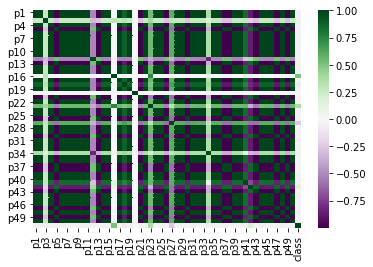

In [26]:
data.corr()
sns.heatmap(data.corr(), cmap='PRGn')

We create a new dataset data_1 where the parameters with the highest correlations are removed. 

In [58]:
upper_tri = data.corr().where(np.triu(np.ones(data.corr().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.999)]
to_drop1 = [column for column in upper_tri.columns if any(upper_tri[column] < -0.999)]

In [60]:
data_1 = data.copy(deep=True)
data_1.drop(columns=to_drop,inplace=True)
data_1.head()

,p1,p3,p5,p12,p16,p18,p20,p23,p27,p34,p41,p42,p44,class
0,2.59413,20.6916,0.009682,135.8850,1689.070,19.3561,0.658684,108.8560,29.6141,377.412,101.174,-31.3730,5.86453,1
1,3.86388,18.1375,0.030733,331.7180,1388.260,6.6951,0.944626,102.4930,31.5767,215.837,186.516,45.9597,6.11126,1
2,3.38584,36.0807,0.017341,159.3960,992.098,16.0030,0.318984,69.8362,59.2516,417.430,129.931,-11.5608,8.27204,1
3,4.28524,674.2010,0.009174,-1.8656,1289.160,12.9374,1.313580,148.0340,17.8265,352.699,163.978,-18.4586,2.48112,1
4,5.93662,59.8796,0.025066,183.6680,949.231,13.9175,0.282402,106.8670,139.4700,317.556,229.555,42.9600,2.66109,1


In [78]:
# We split the data in train and test samples
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.drop('class', axis=1), data['class'], random_state=12)

In [79]:
# We normalize our data 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc.shape
X_test_sc.shape
#X_train_sc

(32516, 50)

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, solver="sag", C=1.6, penalty="l2")

lr_model.fit(X_train_sc,y_train)

y_head_lr = lr_model.predict(X_test_sc)

lr_score = lr_model.score(X_test_sc,y_test)

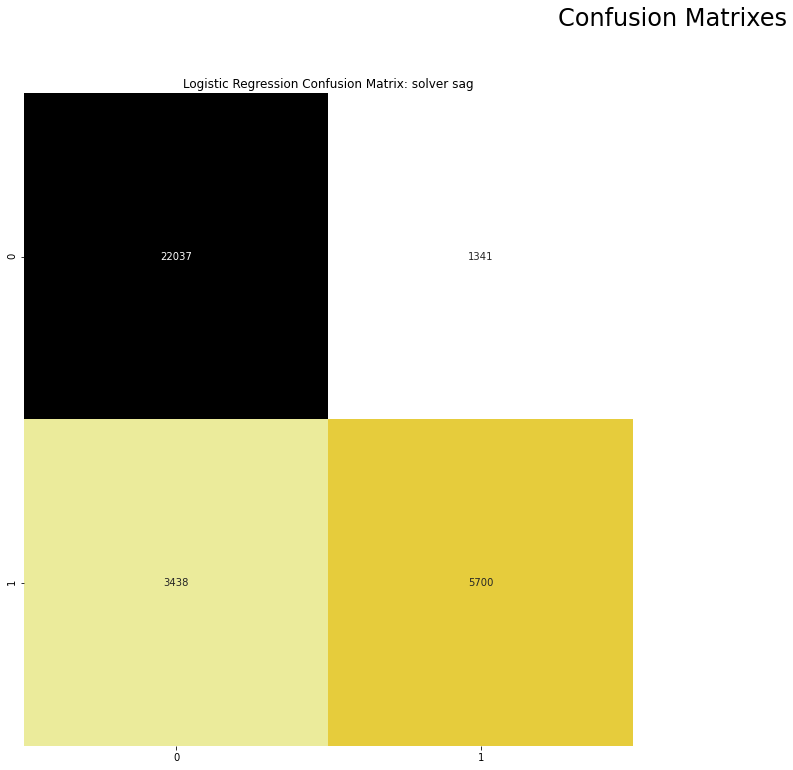

Accuracy for solver sag
0.8530262024849304


In [92]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(1,2,1)
plt.title("Logistic Regression Confusion Matrix: solver sag")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()

print("Accuracy for solver sag")
print(lr_score)

In [93]:
lr2_model = LogisticRegression(random_state=42, solver="saga", C=1.6, penalty="l2")

lr2_model.fit(X_train_sc,y_train)

y_head_lr2 = lr2_model.predict(X_test_sc)

lr2_score = lr2_model.score(X_test_sc,y_test)

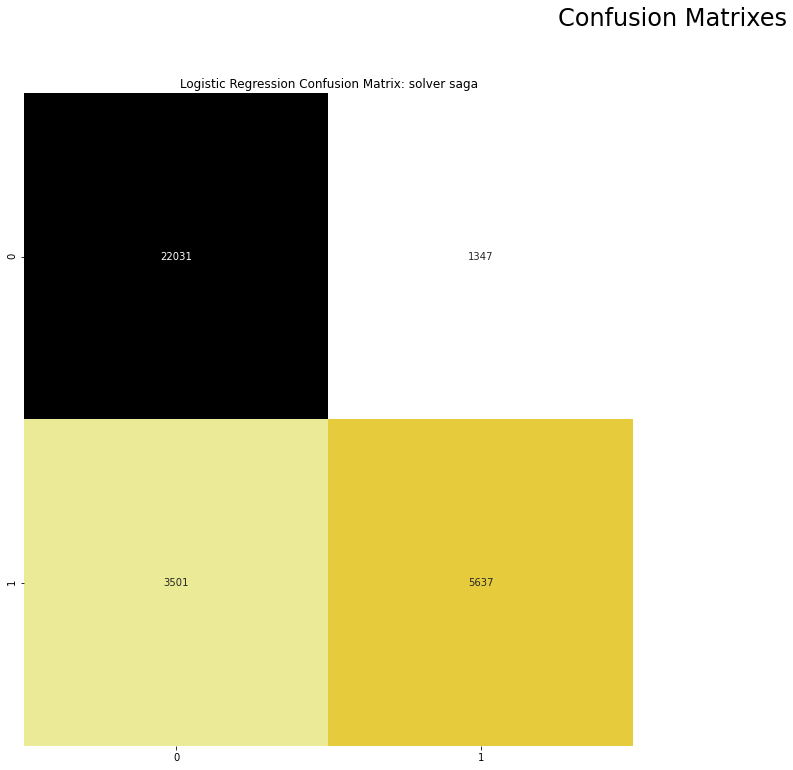

Accuracy for solver saga
0.8509041702546438


In [94]:
cm_lr2 = confusion_matrix(y_test,y_head_lr2)
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(1,2,1)
plt.title("Logistic Regression Confusion Matrix: solver saga")
sns.heatmap(cm_lr2,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()

print("Accuracy for solver saga")
print(lr2_score)

## Neural Network 

In [95]:
import  tensorflow  as tf

In [87]:
# We build our model
input_shape = (50,)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(50,)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

In [88]:
tf.keras.utils.plot_model(model, show_shapes=True,)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [89]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [90]:
history = model.fit(X_train_sc, y_train,epochs=50, batch_size=50, verbose=1, validation_data=(X_test_sc, y_test))

Epoch 1/50
1951/1951 [==============================] - 4s 2ms/step - loss: 0.3284 - accuracy: 0.8605 - val_loss: 0.2607 - val_accuracy: 0.8929
Epoch 2/50
1951/1951 [==============================] - 3s 2ms/step - loss: 0.2452 - accuracy: 0.8973 - val_loss: 0.2290 - val_accuracy: 0.9057
Epoch 3/50
1951/1951 [==============================] - 4s 2ms/step - loss: 0.2256 - accuracy: 0.9055 - val_loss: 0.2168 - val_accuracy: 0.9104
Epoch 4/50
1951/1951 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9112 - val_loss: 0.2088 - val_accuracy: 0.9147
Epoch 5/50
1951/1951 [==============================] - 3s 2ms/step - loss: 0.2071 - accuracy: 0.9135 - val_loss: 0.1979 - val_accuracy: 0.9179
Epoch 6/50
1951/1951 [==============================] - 3s 2ms/step - loss: 0.2019 - accuracy: 0.9170 - val_loss: 0.1988 - val_accuracy: 0.9195
Epoch 7/50
1951/1951 [==============================] - 3s 2ms/step - loss: 0.1978 - accuracy: 0.9186 - val_loss: 0.1934 - val_accuracy:

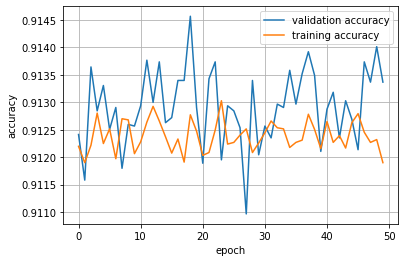

In [77]:
plt.plot(history.epoch,history.history['val_accuracy'],label='validation accuracy')
plt.plot(history.epoch,history.history['accuracy'],label='training accuracy')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)

The neural network we built is most accurate than the Logistic Regression on this set of data. We decided to work with the full data set and let the reduced data set apart: the accuracy wasn't improved and the time of execution the same. Moreover, we had enough training data. 